#ANALYTICAL APPROACH

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

In [5]:
df = pd.read_csv('./passenger_flight_data.csv')

In [6]:
df.head()

Passenger ID    Flight ID   Plane Type    Flight Type    Gate  \
0        ID242  Iberia 1409  Airbus A320  International  Gate B   
1        ID792  Iberia 1409  Airbus A320  International  Gate B   
2        ID189  Iberia 1409  Airbus A320  International  Gate B   
3        ID532  Iberia 1409  Airbus A320  International  Gate B   
4        ID130  Iberia 1409  Airbus A320  International  Gate B   

   Check-in Duration  Security Duration  Passport Duration  Boarding Duration  \
0                  3                  2                2.0                 14   
1                  7                  4                1.0                  6   
2                  7                  3                3.0                 13   
3                  7                  5                2.0                 10   
4                  3                  5                2.0                 12   

   Disembark Duration  Total Processing Time Simulation Parameters  
0                   2                     23       (1, 1, 1, 1, 5)  
1                   4                     22       (1, 1, 1, 1, 5)  
2                   5                     31       (1, 1, 1, 1, 5)  
3                   5                     29       (1, 1, 1, 1, 5)  
4                   1                     23       (1, 1, 1, 1, 5)

In [7]:
df.describe().T

count       mean       std   min   25%   50%   75%  \
Check-in Duration      102400.0   5.014492  2.005424   2.0   3.0   5.0   7.0   
Security Duration      102400.0   3.500244  1.120378   2.0   2.0   4.0   5.0   
Passport Duration       51940.0   1.998883  0.817226   1.0   1.0   2.0   3.0   
Boarding Duration      102400.0  10.008271  3.164494   5.0   7.0  10.0  13.0   
Disembark Duration     102400.0   3.003506  1.414972   1.0   2.0   3.0   4.0   
Total Processing Time  102400.0  22.540400  4.315433  10.0  19.0  23.0  26.0   

                        max  
Check-in Duration       8.0  
Security Duration       5.0  
Passport Duration       3.0  
Boarding Duration      15.0  
Disembark Duration      5.0  
Total Processing Time  36.0

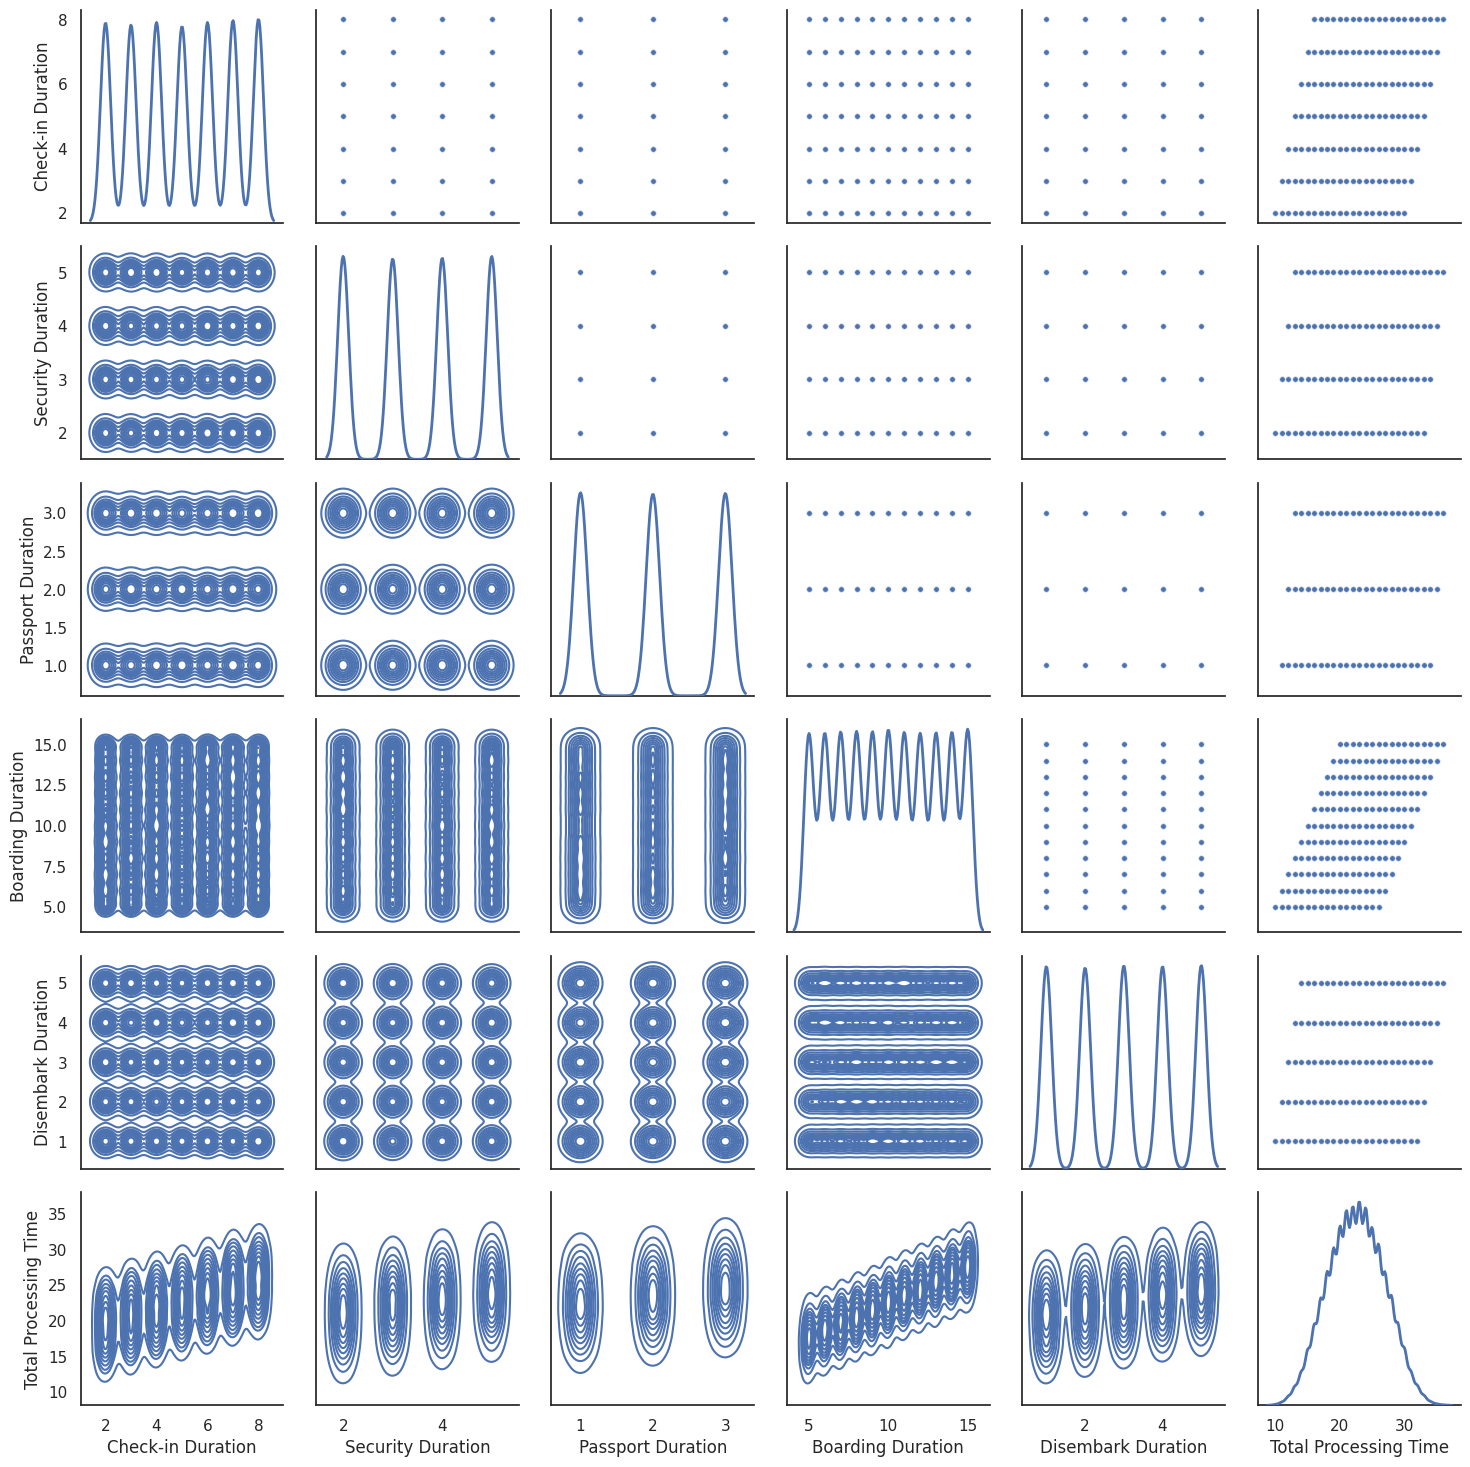

In [8]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

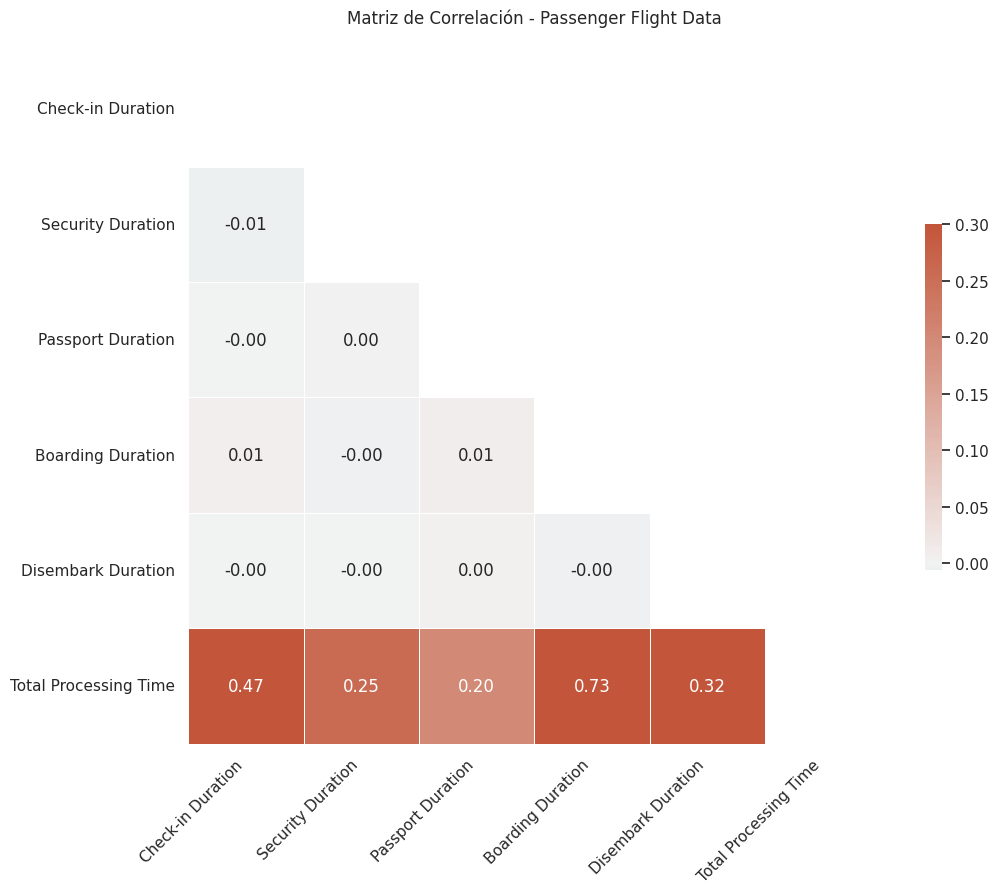

In [9]:
# Columnas a excluir (ajusta según tu dataset)
columns_to_exclude = ['Passenger ID', 'Flight ID', 'Plane Type', 'Flight Type', 'Gate', 'Simulation Parameters']

# Compute the correlation matrix
corr = df.loc[:, ~df.columns.isin(columns_to_exclude)].corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt=".2f")

# Mejorar la legibilidad
plt.title("Matriz de Correlación - Passenger Flight Data", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [10]:
corr.loc['Total Processing Time']

Check-in Duration        0.466564
Security Duration        0.254553
Passport Duration        0.200770
Boarding Duration        0.734934
Disembark Duration       0.324786
Total Processing Time    1.000000
Name: Total Processing Time, dtype: float64

#DISEMBARK DURATION

<Axes: xlabel='Total Processing Time', ylabel='Disembark Duration'>

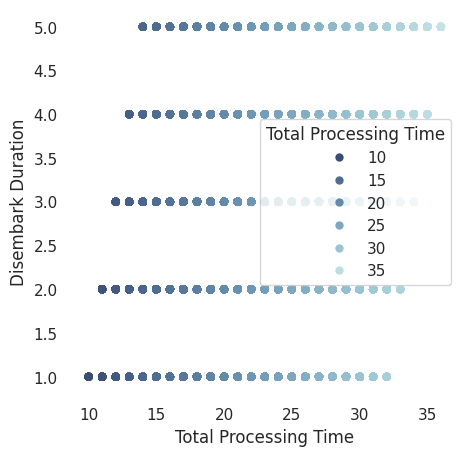

In [11]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(5, 5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Total Processing Time", y="Disembark Duration",
                hue="Total Processing Time", 
                #size="depth",
                palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df[['Disembark Duration', 'Total Processing Time']], ax=ax)

In [16]:
df.groupby('Disembark Duration').min()['Total Processing Time']

Disembark Duration
1    10
2    11
3    12
4    13
5    14
Name: Total Processing Time, dtype: int64

#BOARDING DURATION

<Axes: xlabel='Total Processing Time', ylabel='Boarding Duration'>

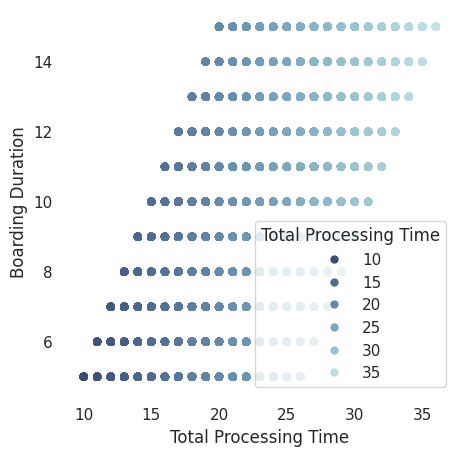

In [17]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(5, 5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Total Processing Time", y="Boarding Duration",
                hue="Total Processing Time", 
                #size="depth",
                palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df[['Boarding Duration', 'Total Processing Time']], ax=ax)

In [18]:
df.groupby('Boarding Duration').min()['Total Processing Time']

Boarding Duration
5     10
6     11
7     12
8     13
9     14
10    15
11    16
12    17
13    18
14    19
15    20
Name: Total Processing Time, dtype: int64

#PASSPORT DURATION

<Axes: xlabel='Total Processing Time', ylabel='Passport Duration'>

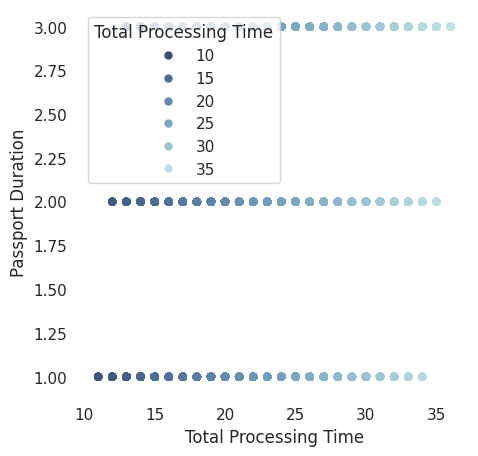

In [15]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(5, 5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Total Processing Time", y="Passport Duration",
                hue="Total Processing Time", 
                #size="depth",
                palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df[['Passport Duration', 'Total Processing Time']], ax=ax)

In [14]:
df.groupby('Passport Duration').min()['Total Processing Time']

Passport Duration
1.0    11
2.0    12
3.0    13
Name: Total Processing Time, dtype: int64

#SECURITY DURATION

<Axes: xlabel='Total Processing Time', ylabel='Security Duration'>

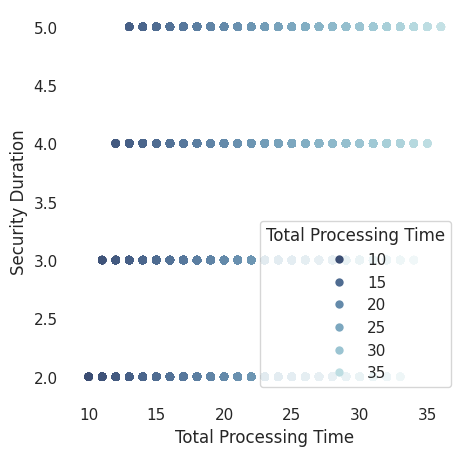

In [19]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(5, 5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Total Processing Time", y="Security Duration",
                hue="Total Processing Time", 
                #size="depth",
                palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df[['Security Duration', 'Total Processing Time']], ax=ax)

In [20]:
df.groupby('Security Duration').min()['Total Processing Time']

Security Duration
2    10
3    11
4    12
5    13
Name: Total Processing Time, dtype: int64

#CHECK-IN DURATION

<Axes: xlabel='Total Processing Time', ylabel='Check-in Duration'>

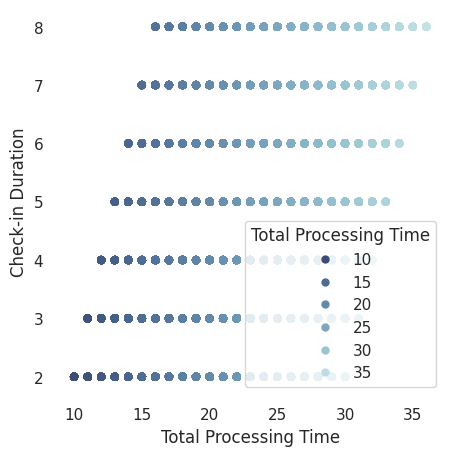

In [21]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(5, 5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Total Processing Time", y="Check-in Duration",
                hue="Total Processing Time", 
                #size="depth",
                palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df[['Check-in Duration', 'Total Processing Time']], ax=ax)

In [22]:
df.groupby('Check-in Duration').min()['Total Processing Time']

Check-in Duration
2    10
3    11
4    12
5    13
6    14
7    15
8    16
Name: Total Processing Time, dtype: int64

#BETTER SOLUTION

##Best of all scenarios

In [24]:
df[df['Total Processing Time']==df['Total Processing Time'].min()].sort_values('Total Processing Time', ascending=True)

Passenger ID               Flight ID   Plane Type Flight Type    Gate  \
556           ID191             Iberia 7092  Airbus A380    Domestic  Gate A   
94951         ID153    United Airlines 3910   Boeing 787    Domestic  Gate C   
93077         ID412             Iberia 3759   Boeing 737    Domestic  Gate L   
91485         ID261             Iberia 4821   Boeing 787    Domestic  Gate Q   
90783         ID858             Iberia 6766  Airbus A380    Domestic  Gate W   
88947         ID465          Lufthansa 8429   Boeing 787    Domestic  Gate D   
86140         ID936          Lufthansa 7403   Boeing 787    Domestic  Gate E   
82953         ID461              Delta 1385   Boeing 737    Domestic  Gate F   
74482         ID509              Delta 1593   Boeing 787    Domestic  Gate E   
73613         ID205             Iberia 7873   Boeing 787    Domestic  Gate C   
73542         ID556    United Airlines 6001  Airbus A320    Domestic  Gate P   
63369         ID335          Lufthansa 7086   Boeing 737    Domestic  Gate I   
63214         ID664  American Airlines 9614  Airbus A320    Domestic  Gate C   
62009         ID503          Lufthansa 6243  Airbus A380    Domestic  Gate B   
51863         ID742    United Airlines 1746   Boeing 737    Domestic  Gate A   
50058         ID217             Iberia 6610   Boeing 787    Domestic  Gate C   
45142         ID709             Iberia 4814  Airbus A320    Domestic  Gate B   
44741         ID714              Delta 5135  Airbus A320    Domestic  Gate V   
2923          ID910          Lufthansa 8370   Boeing 787    Domestic  Gate B   
2936          ID689          Lufthansa 8370   Boeing 787    Domestic  Gate B   
10314         ID342  American Airlines 9716  Airbus A320    Domestic  Gate Q   
16908         ID715              Delta 4602   Boeing 787    Domestic  Gate C   
18265         ID606             Iberia 2213   Boeing 787    Domestic  Gate A   
22486         ID109             Iberia 5665  Airbus A380    Domestic  Gate E   
98598         ID300              Delta 2163   Boeing 787    Domestic  Gate J   
25876         ID683  American Airlines 1599  Airbus A320    Domestic  Gate D   
32508         ID276             Iberia 3996  Airbus A380    Domestic  Gate E   
34289         ID371    United Airlines 5998  Airbus A320    Domestic  Gate O   
36739         ID776          Lufthansa 5997   Boeing 737    Domestic  Gate O   
38594         ID205             Iberia 8281  Airbus A380    Domestic  Gate C   
41143         ID706              Delta 7822   Boeing 787    Domestic  Gate P   
41928         ID592             Iberia 1832  Airbus A380    Domestic  Gate K   
30970         ID138              Delta 1524  Airbus A320    Domestic  Gate J   
101404        ID614          Lufthansa 5239   Boeing 787    Domestic  Gate C   

        Check-in Duration  Security Duration  Passport Duration  \
556                     2                  2                NaN   
94951                   2                  2                NaN   
93077                   2                  2                NaN   
91485                   2                  2                NaN   
90783                   2                  2                NaN   
88947                   2                  2                NaN   
86140                   2                  2                NaN   
82953                   2                  2                NaN   
74482                   2                  2                NaN   
73613                   2                  2                NaN   
73542                   2                  2                NaN   
63369                   2                  2                NaN   
63214                   2                  2                NaN   
62009                   2                  2                NaN   
51863                   2                  2                NaN   
50058                   2                  2                NaN   
45142                   2                  2                NaN   
